In [1]:
import librosa
import numpy as np
import seaborn as sns
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [19]:
SR = 48000
NFFT = 1024
HOP = 64
SIG_LIM = 2 ** 15 - HOP

In [24]:
signal, _ = librosa.load("dataset/gtr/09_Gtr_A_3.wav", mono=True, sr=SR)
signal = signal[:SIG_LIM]
print(signal.shape)
ipd.Audio(signal, rate=SR)

(32704,)


In [25]:
stft = librosa.stft(signal, n_fft=NFFT, hop_length=HOP)
print(stft.shape)
print(stft[:-1].shape)
istft = librosa.istft(stft[:-1], n_fft=NFFT, hop_length=HOP)
print(istft.shape)
ipd.Audio(istft, rate=SR)

(513, 512)
(512, 512)
(32704,)


In [26]:
magnitude = np.abs(stft[:-1])
print(magnitude.shape)
phase = np.angle(stft[:-1])
print(phase.shape)
print(f"Magnitude: {np.min(magnitude)}, {np.max(magnitude)}")
print(f"Phase: {np.min(phase)}, {np.max(phase)}")

(512, 512)
(512, 512)
Magnitude: 1.2949645906701335e-06, 129.01707458496094
Phase: -3.1415488719940186, 3.141592502593994


1.2949638e-06 4.867666


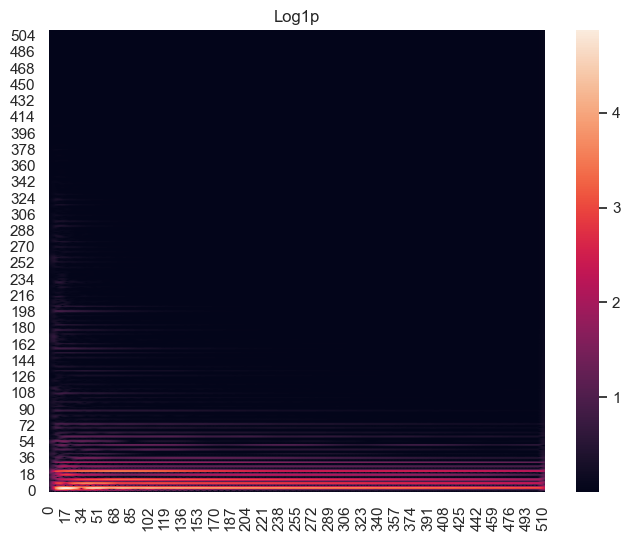

In [27]:
mag_log_scaled = np.log1p(magnitude)
print(np.min(mag_log_scaled), np.max(mag_log_scaled))
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(mag_log_scaled)
ax.invert_yaxis()
plt.title("Log1p")
plt.show()

In [42]:
restored_stft = magnitude * np.exp(1j * phase)
restored_audio = librosa.istft(restored_stft, n_fft=NFFT, hop_length=HOP)
print(restored_audio.shape, np.min(restored_audio), np.max(restored_audio))
ipd.Audio(restored_audio, rate=SR)

(65280,) -0.9375914 0.8982239


37.65054 -42.34946


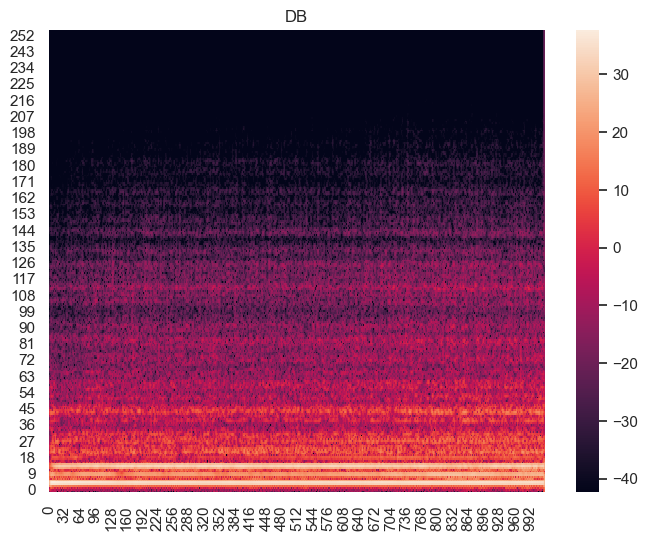

In [45]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
db = librosa.amplitude_to_db(magnitude)
print(np.max(db), np.min(db))
ax = sns.heatmap(db)
ax.invert_yaxis()
plt.title("DB")
plt.show()

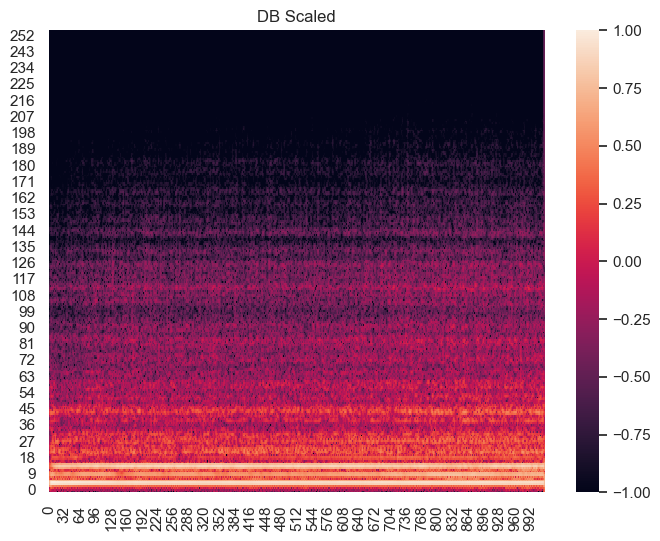

In [46]:
mini, maxi = np.min(db), np.max(db)
db_scaled = 2.0 * (db - mini) / (maxi - mini) - 1.0
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(db_scaled)
ax.invert_yaxis()
plt.title("DB Scaled")
plt.show()

In [47]:
db_restored = (db_scaled + 1.0) * (maxi - mini) / 2.0 + mini
print(np.max(db_restored), np.min(db_restored))
amplitude = librosa.db_to_amplitude(db_restored)
print(f"Magnitude: {np.min(magnitude)}, {np.max(magnitude)}")
print("Amplitude:", np.min(amplitude), np.max(amplitude))

37.65054 -42.34946
Magnitude: 1.313426878368773e-06, 76.3004379272461
Amplitude: 0.007630041 76.30043


In [48]:
restored_stft = amplitude * np.exp(1j * phase)
restored_audio = librosa.istft(restored_stft, n_fft=NFFT, hop_length=HOP)
print(restored_audio.shape, np.min(restored_audio), np.max(restored_audio))
ipd.Audio(restored_audio, rate=SR)

(65280,) -0.9375105 0.8982366


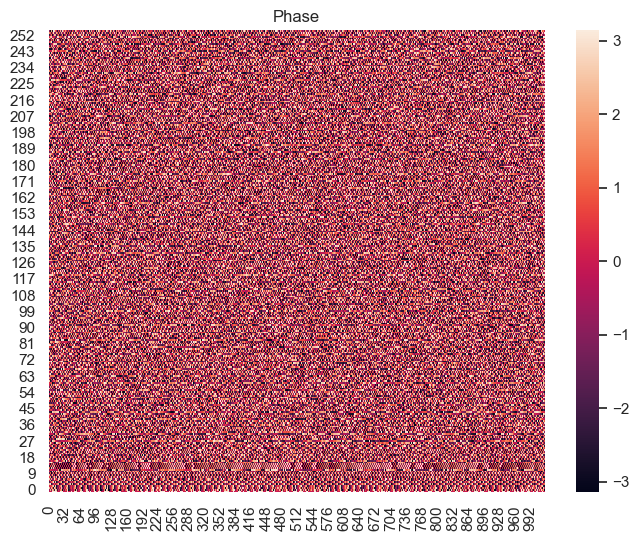

In [49]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(phase)
ax.invert_yaxis()
plt.title("Phase")
plt.show()

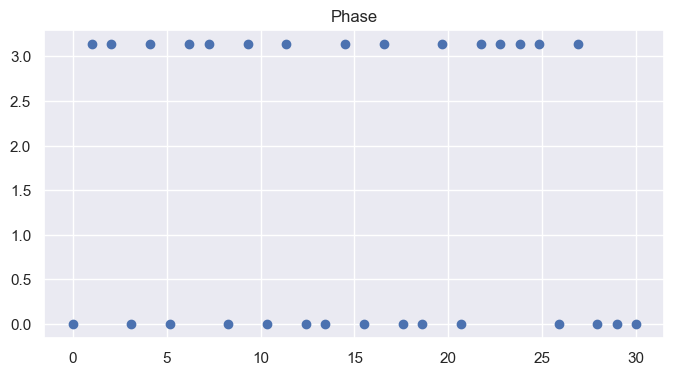

In [50]:
plt.figure(figsize=(8, 4))
start = 80
end = 110
x = np.linspace(0, end-start, end-start)
plt.scatter(x, phase.reshape(-1)[start:end])
plt.title("Phase")
plt.show()